In [ ]:

#  3. Do the Eda on this Dataset :Presidential Election Polls 2024 Dataset and extract useful information from 
#    this:
#Dataset Description:
# This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024. The 
# data offers various insights but does not align with the official election results. You are encouraged to create 
# your notebooks and delve into the data for further exploration


In [9]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = 'election2024.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
print(data.info())
print(data.head())

''' 
    - Here The dataset consists of 1600 rows and 16 columns, with no missing values initially.

'''



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [11]:

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)

''' 
    - Here we can see that there are missing values in two columns:
    - job_type  908
    - company_type 721
'''


Missing values:
 id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64


In [12]:
# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Drop duplicates
data_cleaned = data.drop_duplicates()

''' 
    - There is no any duplications values.
'''

Number of duplicate rows: 0


In [13]:
# Check again missing values.
missing_values_cleaned = data_cleaned.isnull().sum()
print("Missing values after Rechecking:\n", missing_values_cleaned)

''' 
    - So here are missing values in two columns without any duplications:
'''


Missing values after dropping duplicates:
 id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64


In [14]:
# Handle missing values in 'job_type' and 'company_type'
data_cleaned['job_type'].fillna('Unknown', inplace=True)
data_cleaned['company_type'].fillna('Unknown', inplace=True)

# Re-check missing values
missing_values_cleaned = data_cleaned.isnull().sum()
print("Missing values after handling:\n", missing_values_cleaned)

'''
    - Here we have noted a categorical value instead of missing values in job_type and company_type column
'''

Missing values after handling:
 id                     0
sex                    0
age                    0
federal_district       0
type_of_city           0
knows_election_date    0
will_vote              0
candidate              0
television_usage       0
internet_usage         0
education              0
income                 0
employment             0
job_type               0
company_type           0
weight1                0
dtype: int64


In [15]:

# Statistical Summary
stat_summary = data_cleaned.describe()
print("Statistical Summary:\n", stat_summary)

Statistical Summary:
                age      weight1
count  1600.000000  1600.000000
mean     49.936250     1.000000
std      16.901797     0.327084
min      18.000000     0.468226
25%      37.000000     0.772224
50%      49.000000     0.921724
75%      64.000000     1.158913
max      90.000000     2.515072


In [16]:

# Displaying unique values in each column
for column in data_cleaned.columns:
    print(f"Unique values in {column}: {data_cleaned[column].unique()}")
    
''' 
    - Here we are displaying the unique values using for loop from every column..
'''

Unique values in id: ['07169ed8148ce047' '0716a4f3354cecdd' '0716889b304ce79c' ...
 '071690f34d4ce164' '0716bfa9c48ce79a' '07168088318cef88']
Unique values in sex: ['male' 'female']
Unique values in age: [18. 23. 20. 22. 21. 27. 37. 43. 39. 36. 49. 60. 44. 61. 67. 29. 47. 32.
 45. 35. 53. 71. 54. 55. 48. 66. 56. 68. 69. 33. 76. 77. 70. 86. 90. 75.
 80. 24. 19. 25. 28. 31. 26. 30. 38. 40. 41. 52. 50. 51. 46. 63. 34. 42.
 65. 73. 74. 72. 59. 57. 58. 78. 79. 62. 64. 82. 84. 85. 87. 83. 81.]
Unique values in federal_district: ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']
Unique values in type_of_city: ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']
Unique values in knows_election_date: ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']
Uni

In [19]:

# Data Visualization Functions for recurrsively calling it for visualization.
def plot_histogram(column, title, xlabel, ylabel='Frequency', bins=30):
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[column], kde=True, bins=bins)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    
def plot_countplot(column, title, xlabel, ylabel='Count'):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data_cleaned, x=column)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.show()

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


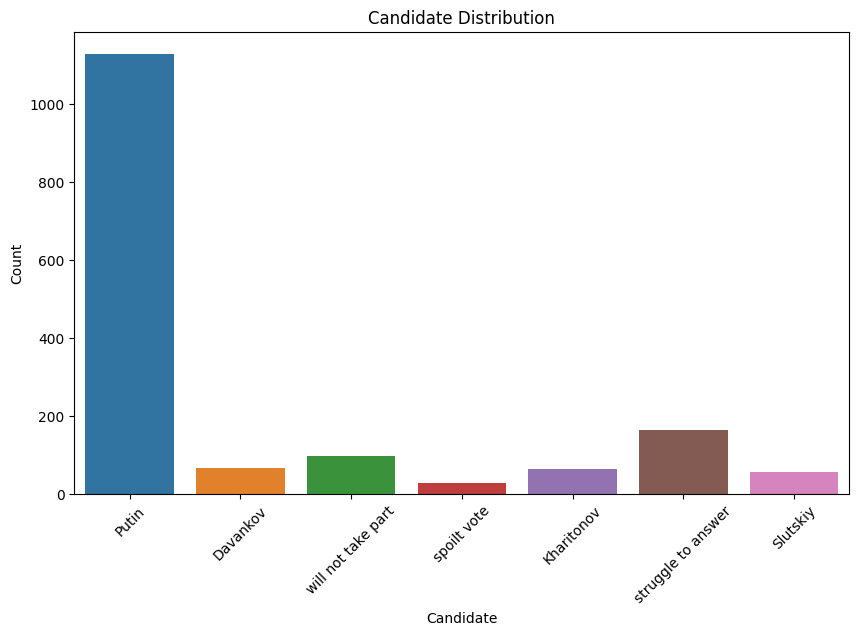

In [20]:

# Here we start the EDA Exploratory Data Analysis.
# 

# Candidate Distribution
plot_countplot('candidate', 'Candidate Distribution', 'Candidate')


''' 
    - The count plot we can see that, which candidates are more popular, indicating potential front runners.
'''

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


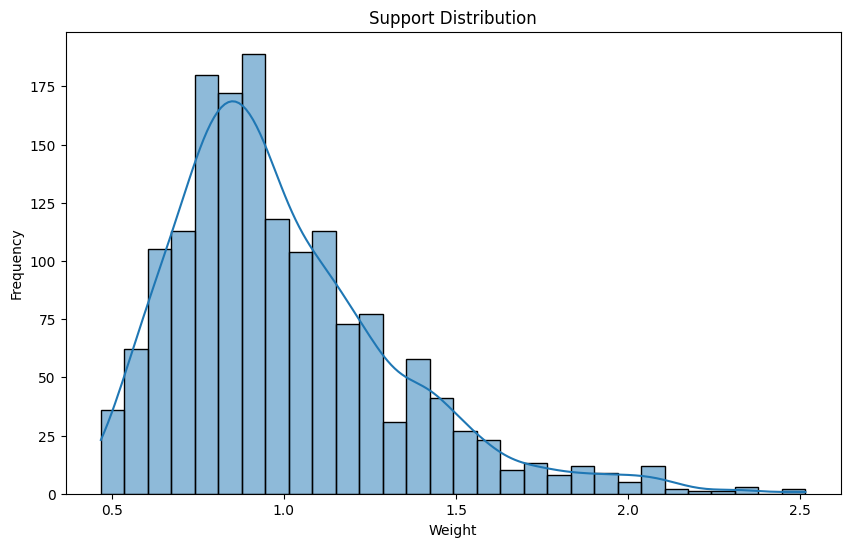

In [21]:

# Support Distribution
plot_histogram('weight1', 'Support Distribution', 'Weight')

''' 
    - The histogram shows how support is distributed across the dataset, indicating overall sentiment.
'''


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


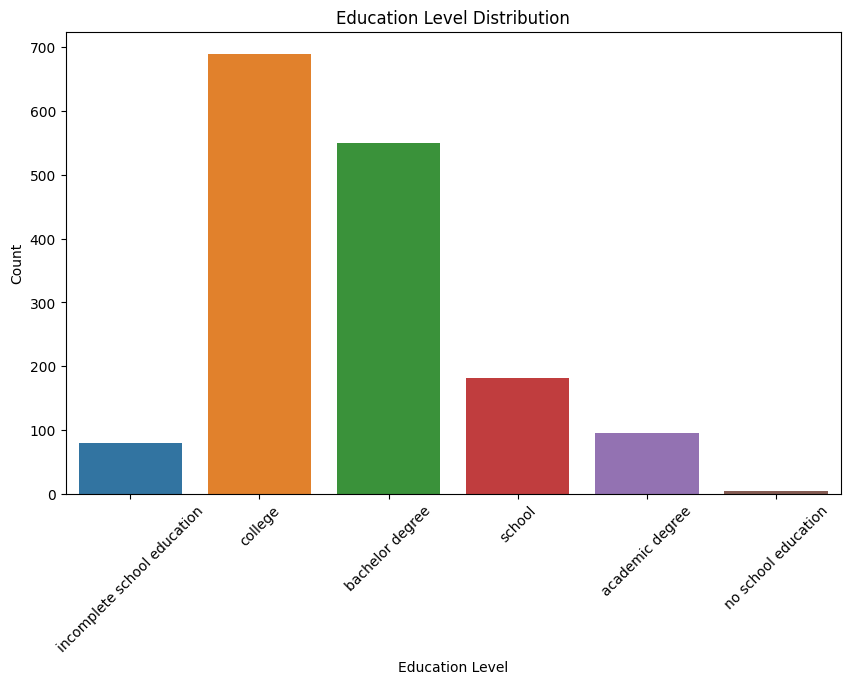

In [22]:

# Bar Plot for Education Level
plot_countplot('education', 'Education Level Distribution', 'Education Level')

''' 
    - The bar plot for education levels highlights the educational background of respondents, 
        which may correlate with their preferences.
'''


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


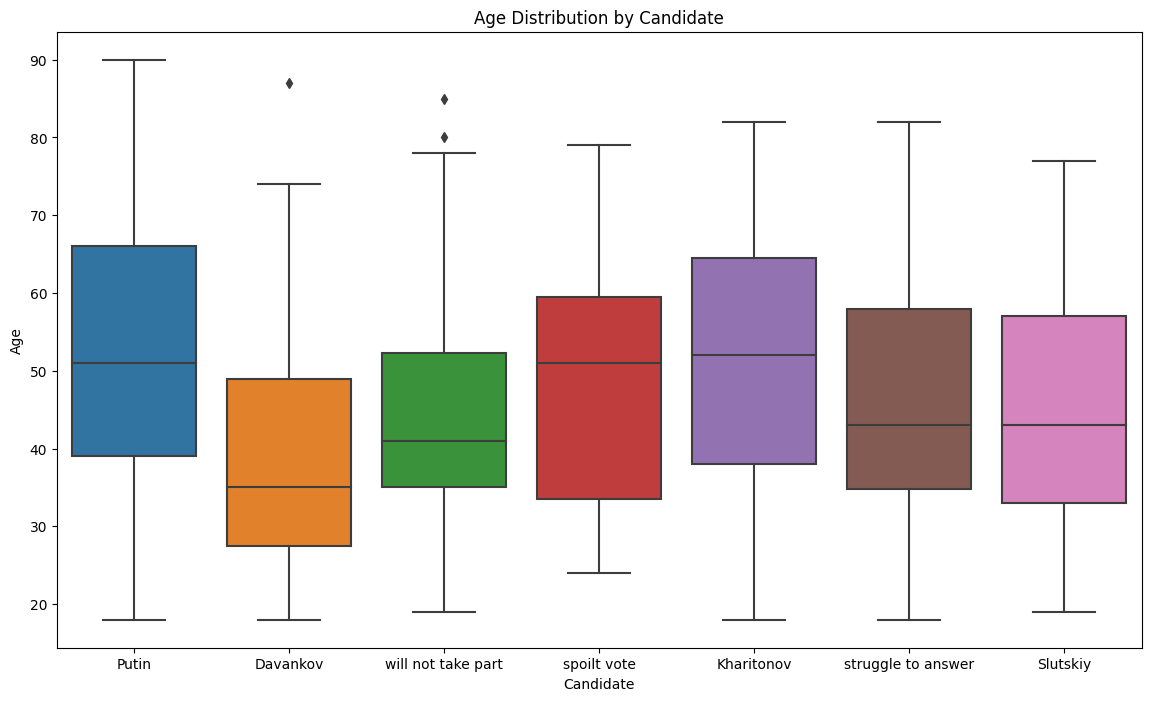

In [23]:

# Box Plot for Age Distribution by Candidate
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned, x='candidate', y='age')
plt.title('Age Distribution by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Age')
plt.show()

''' 
    - The Following boxplot shows the age distribution of supporters for each candidate, 
      suggesting age-related preferences.
'''

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


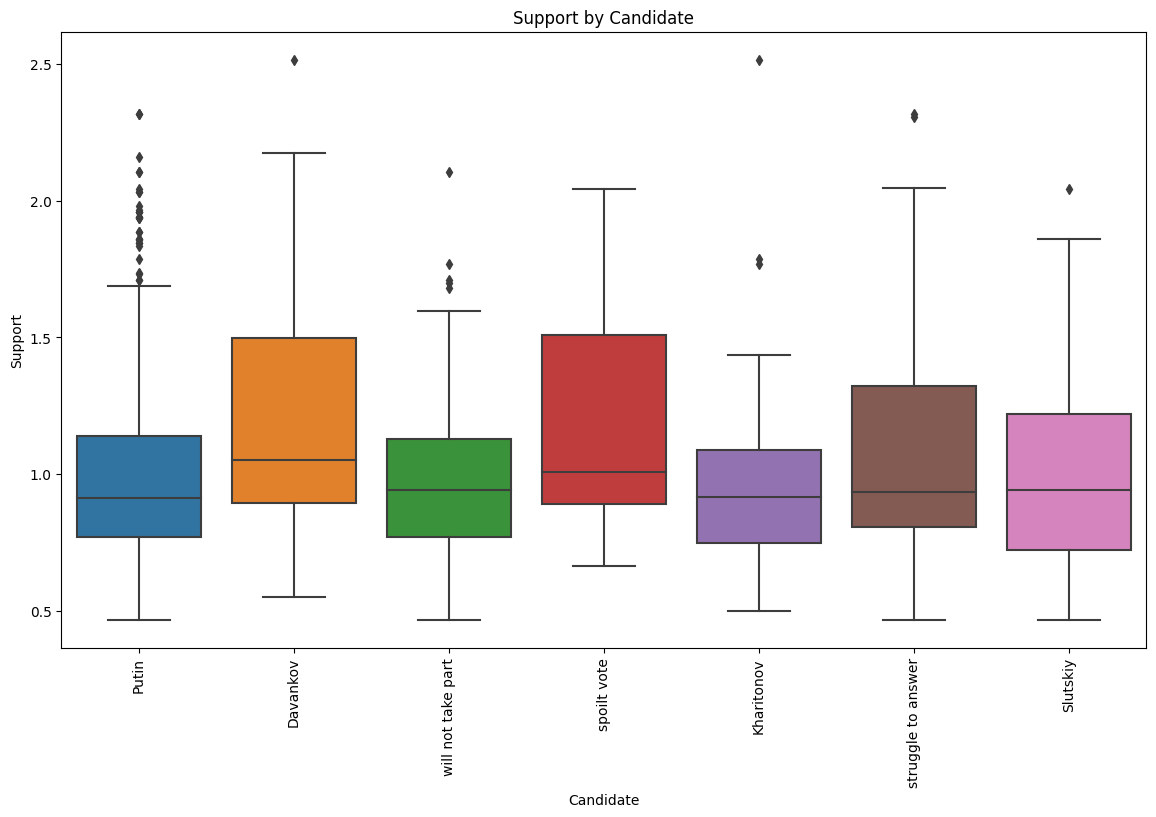

In [24]:
# Polling Support by Candidate
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_cleaned, x='candidate', y='weight1')
plt.title('Support by Candidate')
plt.xlabel('Candidate')
plt.ylabel('Support')
plt.xticks(rotation=90)
plt.show()

''' 
    - This box plot highlights the variability and central tendency of support for each candidate.
'''

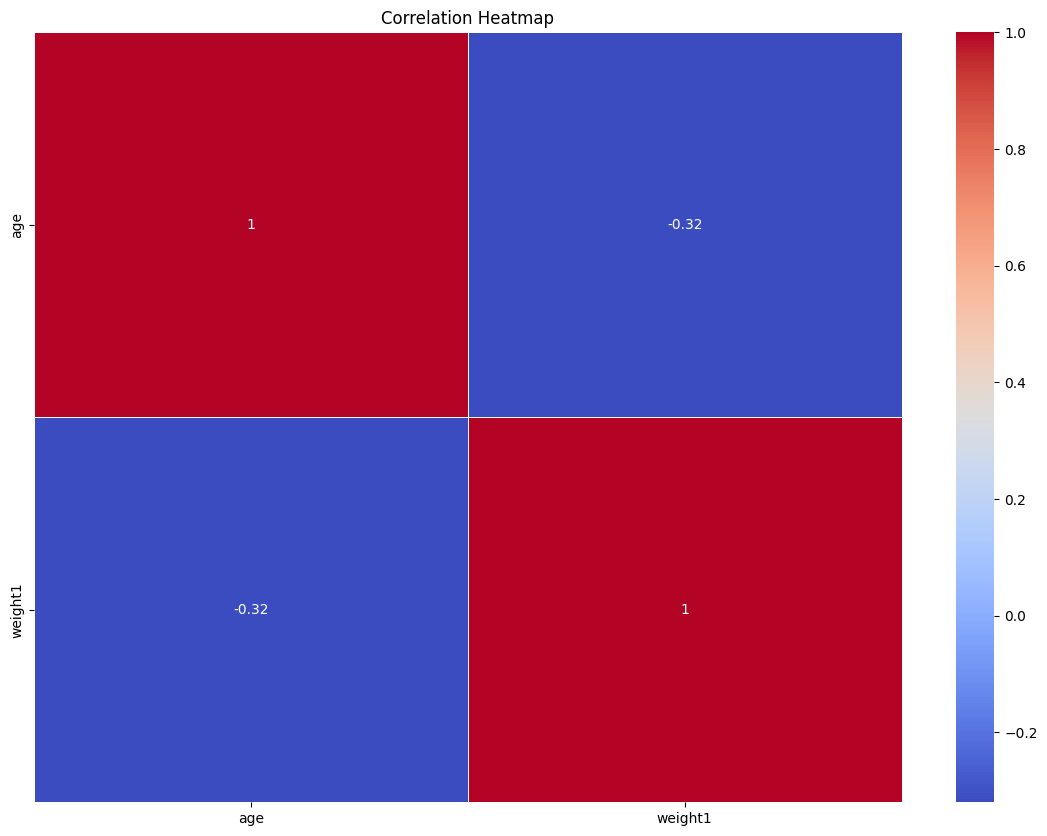

In [27]:
# Select only numeric columns for correlation analysis
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data_cleaned[numeric_cols].corr()

# Correlation Analysis
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

''' 
    - The following heatmap provides an overview of how numeric features correlate, 
      helping to identify multi-collinearity and key predictors.
'''

c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

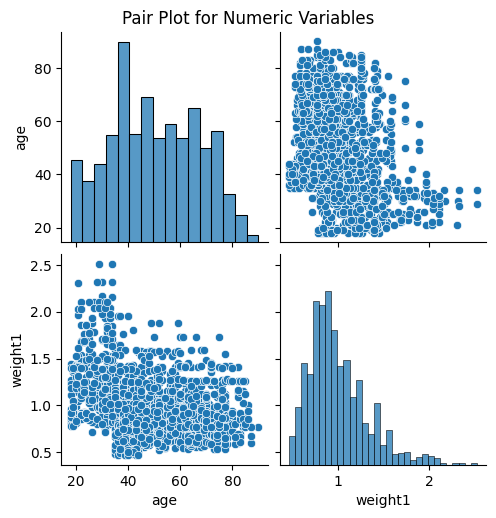

In [28]:
# Pair Plot for Numeric Variables
sns.pairplot(data_cleaned[numeric_cols])
plt.suptitle('Pair Plot for Numeric Variables', y=1.02)
plt.show()

''' 
    - We can see that pairwise relationships between numeric variables displays patterns and potential correlations.
'''

In [29]:
# Cross-tabulations
cross_tab_education_income = pd.crosstab(data_cleaned['education'], data_cleaned['income'])
print("Cross-tabulation between Education and Income:\n", cross_tab_education_income)
'''  
    - The Cross-tabulation between education and income provides 
      insights into how these variables interact.
'''


Cross-tabulation between Education and Income:
 income                       hard to say  high  low  medium  very high  \
education                                                                
academic degree                        1    27   13      47          4   
bachelor degree                        7   155   48     323         11   
college                                5   162   58     425         21   
incomplete school education            1    15   13      44          5   
no school education                    0     1    0       1          1   
school                                 1    45   17     109          6   

income                       very low  
education                              
academic degree                     3  
bachelor degree                     6  
college                            19  
incomplete school education         2  
no school education                 1  
school                              3  


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


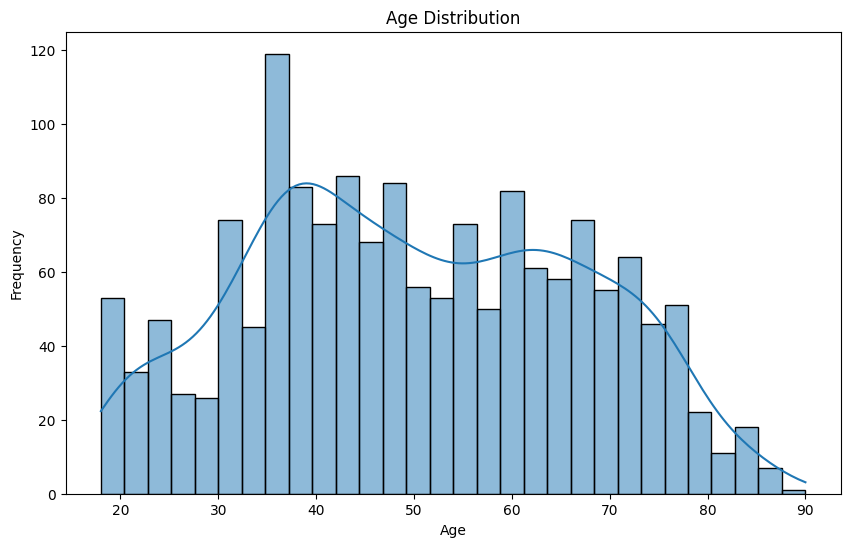

In [30]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

'''
    - Combine this analysis with next income distribution to see the relation
'''


c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Sagar\Envs\tast\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


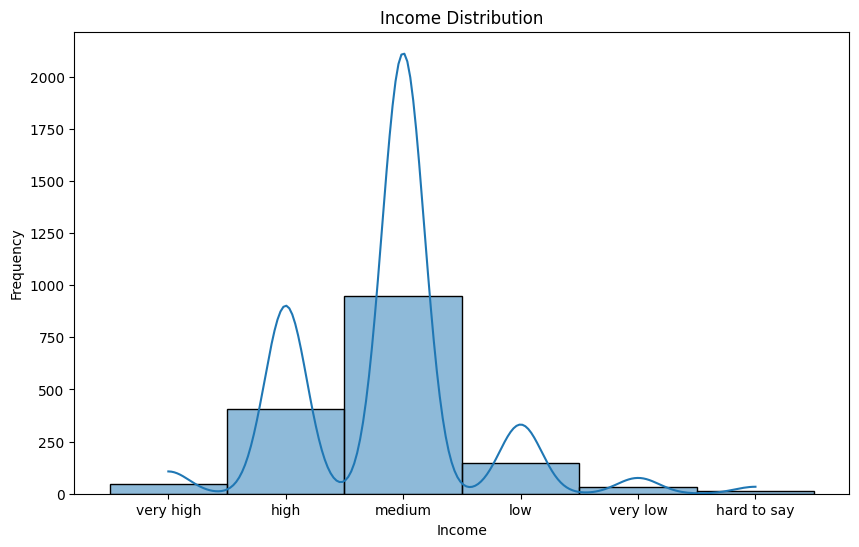

In [31]:
# Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['income'], kde=True, bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

''' 
    - From the histograms of age and income we can see that respondent demographics.
'''

In [32]:

# Correlation with Target Variable.
correlation_with_target = data_cleaned[numeric_cols].corr()['weight1'].sort_values(ascending=False)
print("Correlation with Target Variable 'weight1':\n", correlation_with_target)

''' 
    - The correlation table shows which features are most correlated with the target variable weight1.
'''


Correlation with Target Variable 'weight1':
 weight1    1.000000
age       -0.319715
Name: weight1, dtype: float64


In [37]:

# Feature Importance using Random Forest

# Encode categorical variables
data_encoded = data_cleaned.copy()
for column in data_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    
# Define features and target
features = data_encoded.drop(columns=['weight1'])
target = data_encoded['weight1']

# Train Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(features, target)


RandomForestRegressor(random_state=42)

Feature Importances:
 type_of_city           0.299552
age                    0.286892
education              0.246207
federal_district       0.042012
sex                    0.037907
id                     0.029204
company_type           0.010557
candidate              0.008930
television_usage       0.006940
income                 0.006818
will_vote              0.006587
internet_usage         0.005994
employment             0.005733
job_type               0.005036
knows_election_date    0.001630
dtype: float64


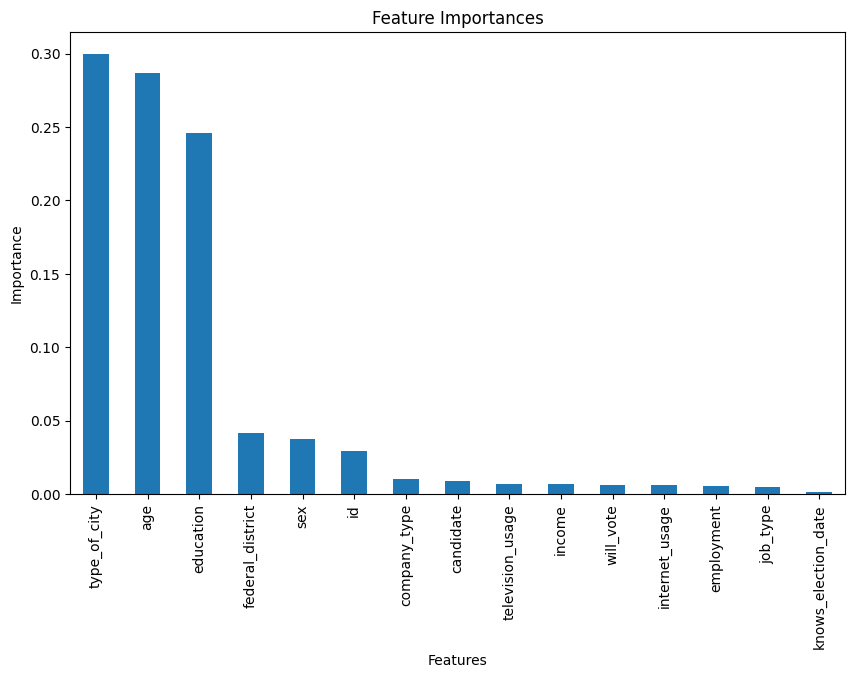

In [36]:


# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=features.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

''' 
    - Feature importance from the Random Forest model identifies which features are most
      predictive of support, guiding further analysis and modeling.
'''


In [ ]:

''' 
    - Final Insights:
    - The count plot of candidates shows which candidates have the most support.
    - The histogram of weight1 shows the distribution of support across the dataset. 
      Most support values cluster around certain ranges, indicating general sentiment among respondents.
    - The bar plot for education levels reveals the educational background of the respondents.
    - Understanding this distribution can help tailor campaign messages to different education groups.
    - The box plot shows the age distribution of supporters for each candidate. Certain candidates may 
      be more popular among specific age groups, which can inform targeted campaigning.
    - The box plot of support by candidate shows the range and distribution of support each 
      candidate receives, highlighting variability and central tendency.
    - The correlation heatmap shows how numeric features relate to each other. 
      This helps identify multicollinearity and key predictors.
    - This can help in identifying key socioeconomic factors influencing voter preferences.
    - Pair plots provide visual insights into the relationships between numeric variables. 
      These relationships can uncover patterns such as how age, income, and education levels 
      interact and influence support for candidates.
    - The cross-tabulation between education and income shows how these factors interact.
      Understanding the intersection of these demographics can help in crafting messages that resonate with specific voter segments.
    - Age and income distributions give a clear picture of the demographics of respondents. Campaigns can use this information to understand the voter 
      base and tailor messages accordingly. For instance, addressing youth unemployment or retirement security based on the predominant age group.
    - Features with high positive correlations are strong predictors of support and should be highlighted in campaigns. Conversely, features with
      negative correlations might indicate areas needing improvement.
    - Random Forest feature importance highlights the most significant predictors of support. 
      For example, if age, income, and education are top predictors, campaigns should emphasize policies related to these factors.
      
      
    -Suggestion for the Action:
    - Targeted Campaign Messaging:Tailor messages to resonate with different demographic groups based on their preferences and characteristics. 
      For instance, address healthcare and retirement issues for older voters and education and job opportunities for younger voters. 
    - Policy Focus:Focus on policies that matter most to the voter base. 
      If income and education are significant predictors of support, emphasize economic policies and educational reforms in the campaign. 
    - Segmentation and Personalization:Perform segmentation analysis to understand different voter groups. 
      Use these insights to personalize communication and outreach efforts, ensuring that messages are relevant and impactful.
    - Regional Campaigning:If geographic data is available, conduct a regional analysis to 
      identify areas with strong support and regions needing more attention. Tailor regional campaigns to address local issues and concerns.
    - Engage and Mobilize Supporters:Use insights from age and education distributions to engage supporters effectively. For example, organize events and 
      initiatives that appeal to specific age groups or educational backgrounds.
    - Resource Allocation:Allocate resources efficiently based on feature importance and correlation
      analysis. Focus efforts on areas with the highest impact on voter support to maximize campaign effectiveness.

'''
